##Problem Statements
Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

###Write a summary for your data
The Iris dataset consists of 150 samples of iris flowers from three different species: Setosa, Versicolor, and Virginica. Each sample includes four features: sepal length, sepal width, petal length, and petal width. It was introduced by the British biologist and statistician Ronald Fisher in 1936 as an example of discriminant analysis.

In this dataset that contain:
- 50 sample of Setosa Species
- 50 sample of Versicolor Species
- 50 sample of Virginica Species


###Write Column descriptions

This dataset have 4 numeric column and 1 categorical column

`Numerical column:`
- Sepal Length: The length of the sepal, which is the outermost part of the flower.
- Sepal Width: The width of the iris flower's sepals.
- Petal Length: The length of the petal, which is the colorful part of the flower.
- Petal Width: The width of the iris flower's petals.

`Categorical Column:`

- Species: This column contain have three category  Setosa, Versicolor, and Virginica.
  - Iris Setosa: A small species with short sepals and petals.
  - Iris versicolor: A medium-sized species with moderate sepal and petal dimensions.
  - Iris virginica: The largest species with the longest sepals and petals.




Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load Dataset

In [ ]:
iris = pd.read_csv('Iris.csv')

Create a copy of data for anlysis

In [ ]:
iris_df = iris.copy()
iris_df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa


Shape of Dataset

In [ ]:
iris_df.shape

(150, 6)

Remove unnecessary columns

In [ ]:
iris_df = iris_df.drop('Id', axis=1)

In [ ]:
iris_df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
29,4.7,3.2,1.6,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa


Information of Dataset

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Statistical information

In [ ]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Distribution of target column

In [ ]:
iris_df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


###Data Visulization

####Visulization of Species

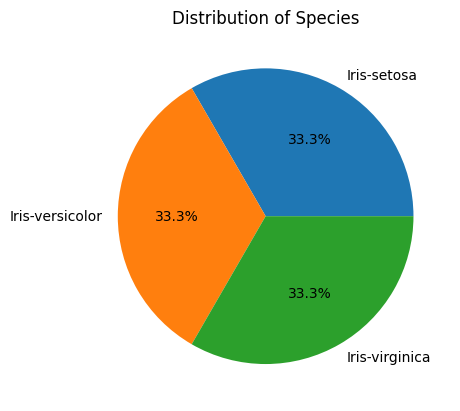

In [ ]:
plt.pie(iris_df['Species'].value_counts(), labels=iris_df['Species'].value_counts().index , autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.show()

####Relation between variables

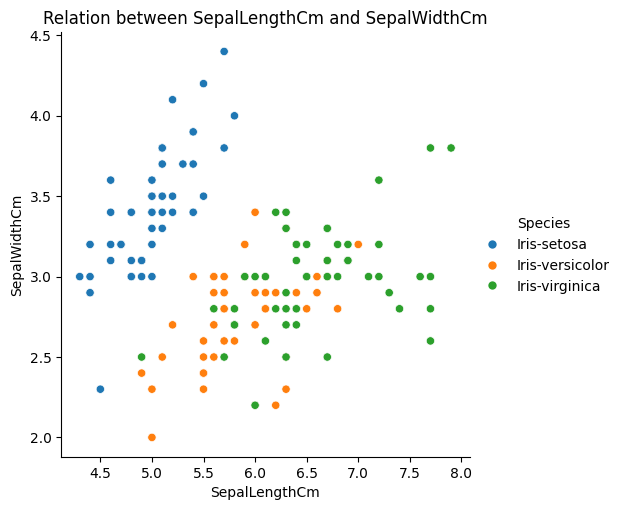

In [ ]:
sns.relplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title('Relation between SepalLengthCm and SepalWidthCm')
plt.show()

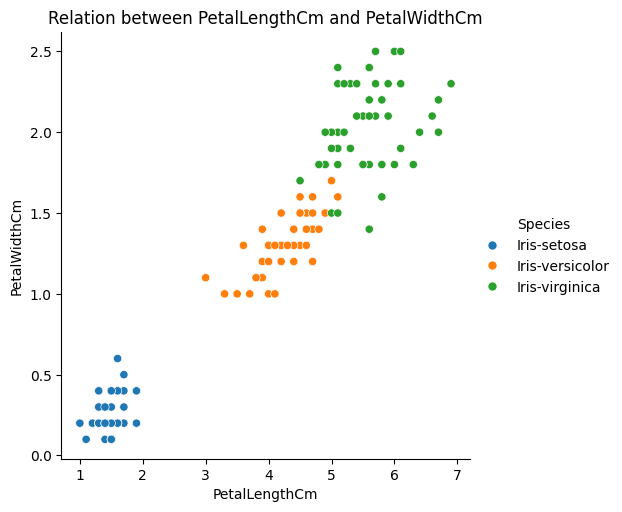

In [ ]:
sns.relplot(data=iris_df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title('Relation between PetalLengthCm and PetalWidthCm')
plt.show()

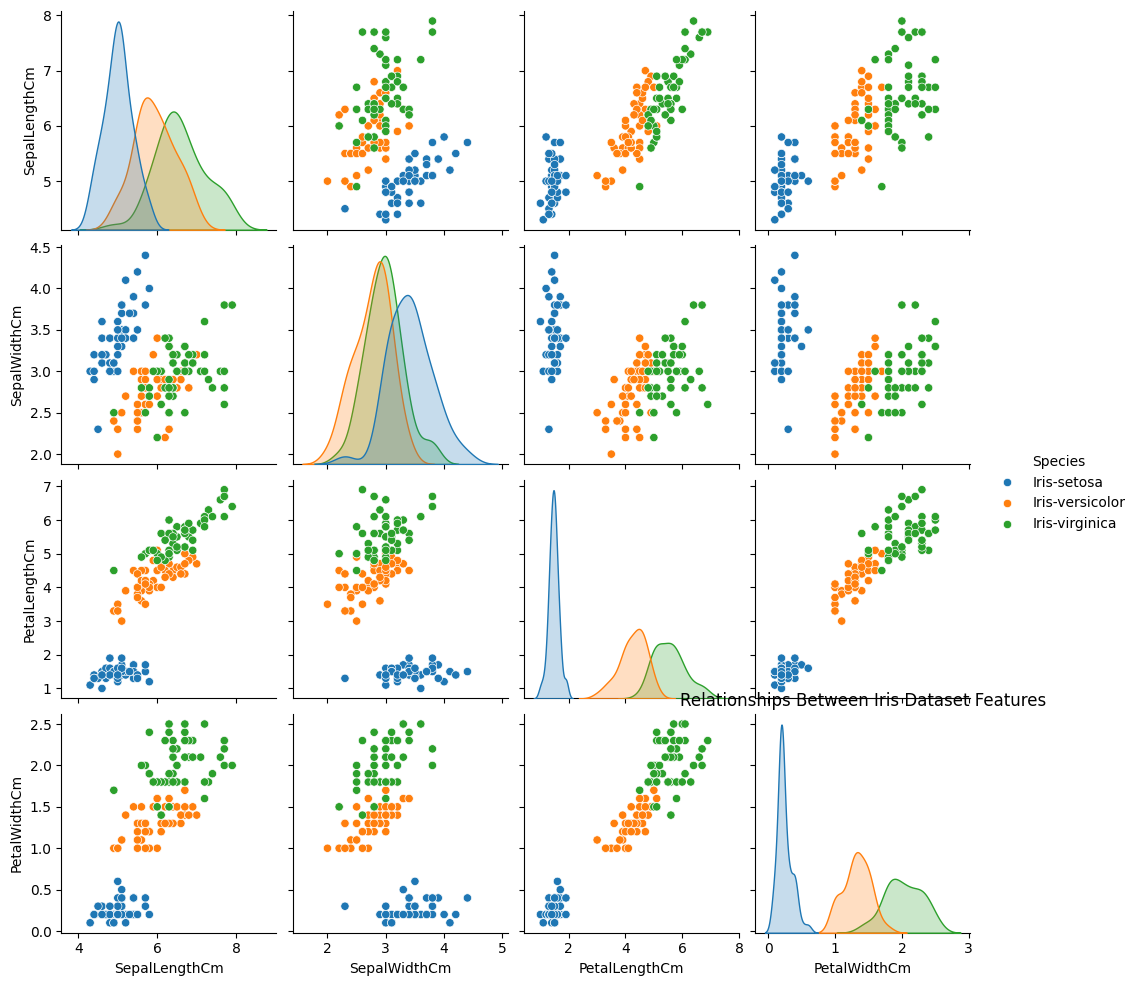

In [ ]:
sns.pairplot(data=iris_df, hue='Species')
plt.title('Relationships Between Iris Dataset Features')
plt.show()

###Modeling

####Train and Test Dataset

In [ ]:
X = iris_df.drop(columns=['Species'], axis=1).values
y = iris_df['Species'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Reshape to 1D array
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

- 0: 'Iris-setosa'
- 1: 'Iris-versicolor'
- 2: 'Iris-virginica'

In [ ]:
X_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [ ]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [ ]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

###Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.predict([[6.1, 2.8, 4.7, 1.2]])

array([1])

- 0: 'Iris-setosa'
- 1: 'Iris-versicolor'
- 2: 'Iris-virginica'

In [ ]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.975, 1.0)

In [ ]:
lr_y_pred = lr.predict(X_test)
lr_y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

<Axes: >

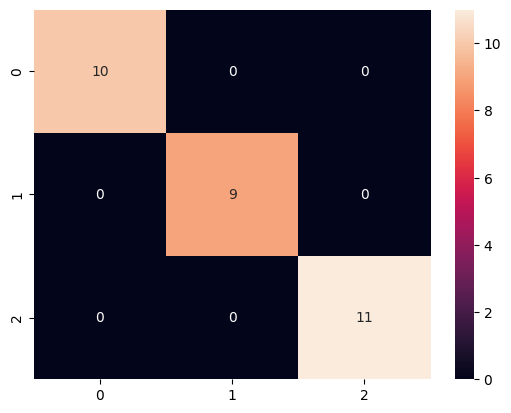

In [ ]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(lr_cm, annot=True)

In [ ]:
lr_cr = classification_report(y_test, lr_y_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
lr_as = accuracy_score(y_test, lr_y_pred)
print(lr_as)

1.0


###Support Vector Matrix

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
svm.predict([[5.8, 2.7, 5.1, 1.9]])

array([2])

- 0: 'Iris-setosa'
- 1: 'Iris-versicolor'
- 2: 'Iris-virginica'

In [ ]:
svm.score(X_test, y_test)

1.0

In [ ]:
svm_y_pred = svm.predict(X_test)
svm_y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

- 0: 'Iris-setosa'
- 1: 'Iris-versicolor'
- 2: 'Iris-virginica'

<Axes: >

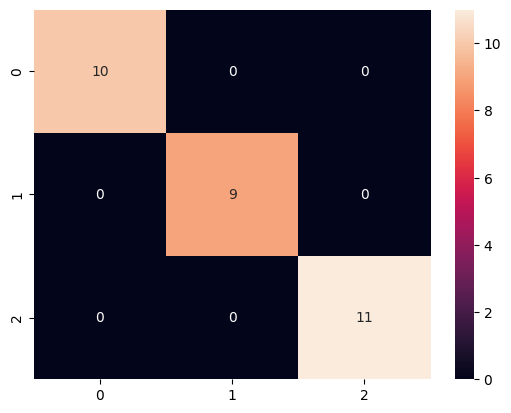

In [ ]:
svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm, annot=True)

In [ ]:
svm_cr = classification_report(y_test, svm_y_pred)
print(svm_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
svm_as = accuracy_score(y_test, svm_y_pred)
print(svm_as)

1.0


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.predict([[5.8, 2.7, 5.1, 1.9]])

array([2])

- 0: 'Iris-setosa'
- 1: 'Iris-versicolor'
- 2: 'Iris-virginica'

In [ ]:
rf.score(X_test, y_test)

1.0

In [ ]:
rf_y_pred = rf.predict(X_test)
rf_y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

- 0: 'Iris-setosa'
- 1: 'Iris-versicolor'
- 2: 'Iris-virginica'

<Axes: >

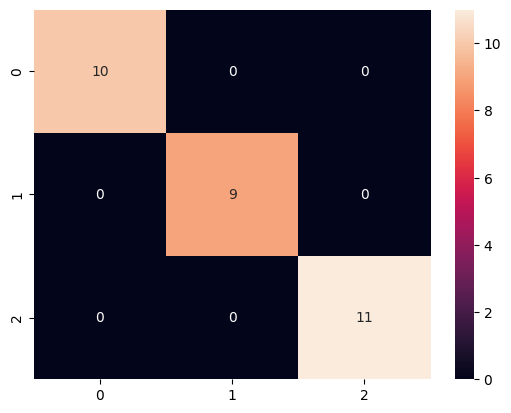

In [ ]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True)

In [ ]:
rf_cr = classification_report(y_test, rf_y_pred)
print(rf_cr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
rf_as = accuracy_score(y_test, rf_y_pred)
print(rf_as)

1.0
